# Projeto 2 Ciência dos Dados - Engenharia Insper 2021.1
## Integrantes: Rafael Pascarelli Nicheri e Vinícius Matheus Morales
____________________________________________________________________________________________________________________________
## Objetivo:
### - Com esse projeto pretendemos prever o valor do aluguel de um determinado imóvel com base nos seguintes dados:
- Tamanho do terreno em m²;
- Quantidade de quartos;
- Quantidade de banheiros;
- Quantidade de suítes;
- Quantidade de vagas de carro;
- Se possui elevador;
- Se possui móveis;
- Se possui piscina;
- Se é uma construção nova;
- Região da cidade de São Paulo onde o imóvel se encontra.

## 1. Importando as bibliotecas que serão utilizadas no projeto e lendo o Dataset que será utilizado para as previsões

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [5]:
data = pd.read_csv('sao-paulo-properties-april-2019.csv')  #ler uma base de dados no formato csv

### 1.1 Filtrando o Dataset em um DataFrame que contenha apenas os aluguéis e exclua as vendas

In [6]:
rent_filter = data['Negotiation Type'] == 'rent' # Filtro para usarmos apenas dados de aluguel
rent_data = data.loc[rent_filter, :] # Aplicando o filtro para mostrar apenas dados de alugel
rent_data   #mostrando a base de dados apemnas com dados do aluguel

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


### 1.2 Cruzando dados das variáveis dependentes com a variável independente
- Com o objetivo de observar o comportamento da variável target do projeto "Preço" com cada feature.
- A variável target é uma variável do tipo quantitativa, portanto ao cruzar com outras variáveis quantitativas como "Condo", "Size", "Rooms", "Toilets", "Suites" e "Parking" iremos utilizar medidas de associação e gráfico de dispersão.
- Ao cruzar as informações com variáveis qualitativas como "Elevator", "Furnished", "Swimming Pool" e "New" iremos usar medidas-resumo da variável quantitativa segmentando por rótulo da variável qualitativa e histogramas da variável quantitativa segmentando por rótulo da variável qualitativa.

(array([1., 0., 1., 0., 1., 0., 0., 0., 0., 3.]),
 array([1250., 1385., 1520., 1655., 1790., 1925., 2060., 2195., 2330.,
        2465., 2600.]),
 <BarContainer object of 10 artists>)

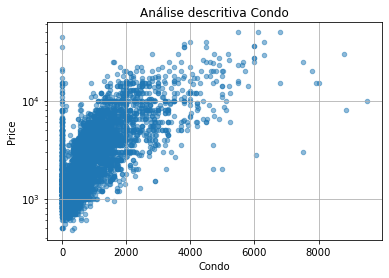

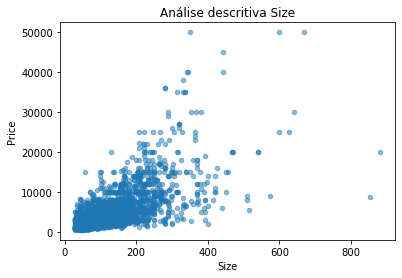

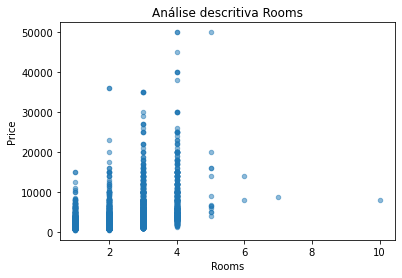

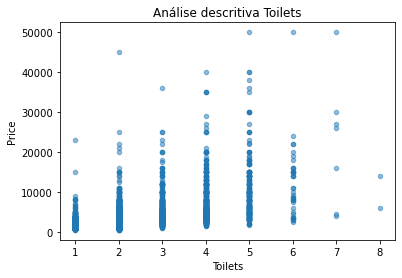

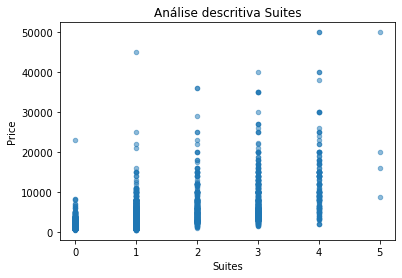

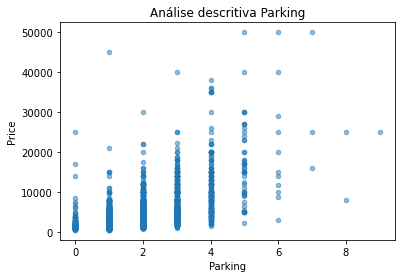

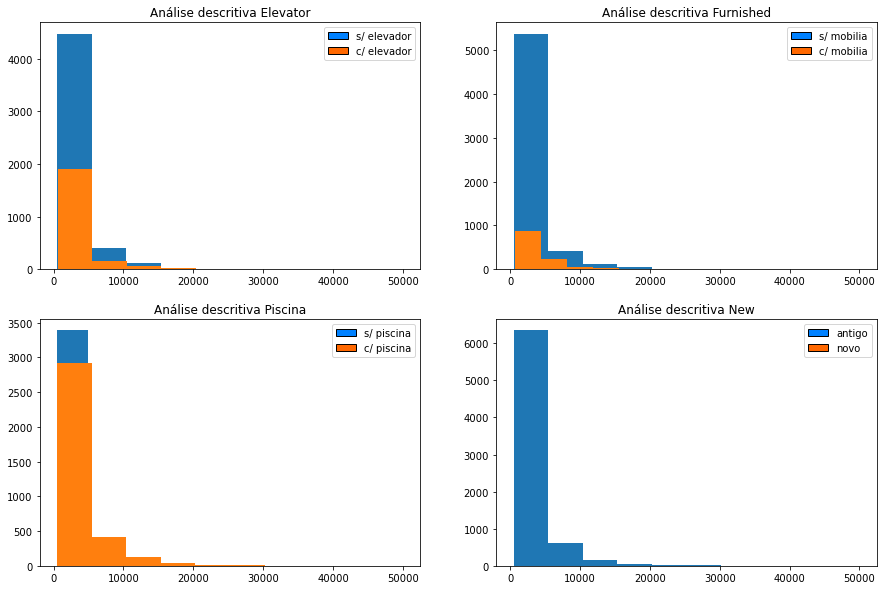

In [20]:
#classificando as variaveis
'Condo = Quantitativa'
'Size = Quantitativo'
'Rooms = Quantitativo'
'Toilets = Quantitativo'
'Suites = Quantitativo'
'Parking = Quantitativo'
'Elevator = Qualitativo'
'Furnished = Qualitativo'
'Swimming Pool = Qualitativo'
'New = Qualitativo'
'Price = Quantitativo'

'---------------------------------------------------------------------------------------------------------------------------'
#graficos


#condo_price
condo_price=rent_data.loc[:, ['Price', 'Condo']]            #fazer um dataset apenas com os dados Price e condo
condo_price.plot.scatter(x='Condo', y='Price', grid=True, title='Análise descritiva Condo', alpha=0.5, logy=True);  #cria um scatter plot

#size_price
size_price=rent_data.loc[:, ['Price', 'Size']]              #faqzer um dataset apenas com os dados Price e size
size_price.plot.scatter(x='Size', y='Price', title='Análise descritiva Size', alpha=0.5, logy=True);    #cria um scatter plot

#rooms_price
rooms_price=rent_data.loc[:, ['Price', 'Rooms']]            #faqzer um dataset apenas com os dados Price e Rooms
rooms_price.plot.scatter(x='Rooms', y='Price', title='Análise descritiva Rooms', alpha=0.5, logy=True);  #cria um scatter plot

#toilets_price
toilets_price=rent_data.loc[:, ['Price', 'Toilets']]        #faqzer um dataset apenas com os dados Price e Toilets
toilets_price.plot.scatter(x='Toilets', y='Price', title='Análise descritiva Toilets', alpha=0.5, logy=True); #cria um scatter plot

#suites_price
suites_price=rent_data.loc[:, ['Price', 'Suites']]          #faqzer um dataset apenas com os dados Price e Suits
suites_price.plot.scatter(x='Suites', y='Price', title='Análise descritiva Suites', alpha=0.5, logy=True);#cria um scatter plot

#parking_price
parking_price=rent_data.loc[:, ['Price', 'Parking']]        #faqzer um dataset apenas com os dados Price e Parking
parking_price.plot.scatter(x='Parking', y='Price', title='Análise descritiva Parking', alpha=0.5, logy=True); #cria um scatter plot

# #elevator_price
# elevator_price=rent_data.loc[:, ['Price', 'Elevator']]
# elevator_price1=pd.crosstab(elevator_price['Price'], elevator_price['Elevator'])
# ax=elevator_price1.plot.hist(alpha=0.5);

# #furnished_price
# furnished_price=rent_data.loc[:, ['Price', 'Furnished']]
# furnished_price1=pd.crosstab(furnished_price['Price'], furnished_price['Furnished'])
# ax=furnished_price1.plot.hist(alpha=0.5);

plt.figure(figsize=(15,10)) #cria uma figura para plotar os graficos da maneira mais organizada
cmap = plt.get_cmap('jet') #palheta de cor
#elevator_price
elevator_filter = rent_data.loc[rent_data['Elevator'] == 0, 'Price'] #cria um filtro apenas para dados de apartamentos que nao tem elevador
elevator_filter1 = rent_data.loc[rent_data['Elevator'] == 1, 'Price'] #cria um filtro apenas para dados de apartamentos que tem elevador
plt.subplot(221) #escolhe em qual parte da figura crianda enteriormente este grafico sera plotado
#legendas
plt.title('Análise descritiva Elevator')
elevator_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] #cria um retangulo para colocar as legendas e escolhe as cores das legendas
elevator_2= ["s/ elevador","c/ elevador"] #define o que sera escrito nas legendas
plt.legend(elevator_1, elevator_2) #cria as lendas
'as duaas linhas abaixo criam um grafico com os histogramas dos dados com e sem elevador'
plt.hist(elevator_filter)
plt.hist(elevator_filter1)

#furnished_price
furnished_filter = rent_data.loc[rent_data['Furnished'] == 0, 'Price'] #cria um filtro apenas para dados de apartamentos que nao tem mobilia
furnished_filter1 = rent_data.loc[rent_data['Furnished'] == 1, 'Price'] #cria um filtro apenas para dados de apartamentos que tem mobilia
plt.subplot(222) #escolhe em qual parte da figura crianda enteriormente este grafico sera plotado
#legendas
plt.title('Análise descritiva Furnished')
furnished_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] #cria um retangulo para colocar as legendas e escolhe as cores das legendas
furnished_2= ["s/ mobilia","c/ mobilia"] #define o que sera escrito nas legendas
plt.legend(furnished_1, furnished_2) #cria as lendas
'as duaas linhas abaixo criam um grafico com os histogramas dos dados com e sem movilia'
plt.hist(furnished_filter)
plt.hist(furnished_filter1)

#swimmingpool_price
swimmingpool_filter = rent_data.loc[rent_data['Swimming Pool'] == 0, 'Price'] #cria um filtro apenas para dados de apartamentos que nao tem piscina
swimmingpool_filter1 = rent_data.loc[rent_data['Swimming Pool'] == 1, 'Price'] #cria um filtro apenas para dados de apartamentos que tem piscina
plt.subplot(223) #escolhe em qual parte da figura crianda enteriormente este grafico sera plotado
#legendas
plt.title('Análise descritiva Piscina')
piscina_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] #cria um retangulo para colocar as legendas e escolhe as cores das legendas
piscina_2= ["s/ piscina","c/ piscina"] #define o que sera escrito nas legendas
plt.legend(piscina_1, piscina_2) #cria as lendas
'as duaas linhas abaixo criam um grafico com os histogramas dos dados com e sem piscina'
plt.hist(swimmingpool_filter)
plt.hist(swimmingpool_filter1)

#new_price
new_filter = rent_data.loc[rent_data['New'] == 0, 'Price'] #cria um filtro apenas para dados de apartamentos que nao sao novos
new_filter1 = rent_data.loc[rent_data['New'] == 1, 'Price'] #cria um filtro apenas para dados de apartamentos novos
plt.subplot(224) #escolhe em qual parte da figura crianda enteriormente este grafico sera plotado
#legendas
plt.title('Análise descritiva New')
novo_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]] #cria um retangulo para colocar as legendas e escolhe as cores das legendas
novo_2= ["antigo","novo"] #define o que sera escrito nas legendas
plt.legend(novo_1, novo_2) #cria as lendas
'as duaas linhas abaixo criam um grafico com os histogramas dos dados de apaetamentos nao novos e novos'
plt.hist(new_filter, density=False)
plt.hist(new_filter1, density=False)

###

### 1.2 Reordenando os dados para ficarem em uma ordem mais legível

In [16]:
# DataFrame com os dados relevantes
relevant_data = rent_data.iloc[:, :-5]
relevant_data = relevant_data.loc[:, ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'Price']]
relevant_data.sort_values(['Condo'], ascending=True)

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Price
10993,0,50,2,1,0,1,1,0,0,0,1600
456,0,60,2,2,1,1,0,0,0,0,1550
3563,0,130,3,4,3,3,0,0,1,0,3000
2872,0,40,1,1,0,0,0,0,0,0,1100
4783,0,54,2,1,0,0,0,0,0,0,1300
...,...,...,...,...,...,...,...,...,...,...,...
10347,7928,340,3,4,3,5,0,0,1,0,15000
4269,8000,452,4,5,4,6,0,0,0,0,15000
10669,8800,640,4,5,4,5,0,1,1,0,30000
10684,8860,414,4,5,4,4,0,0,1,0,8000


## 2. Preprocessamento de dados

In [10]:
# Transformando int em float para auxiliar no dimensionamento de recursos
for i in relevant_data.keys():
    relevant_data[i] = relevant_data[i].astype(float)

In [28]:
X = relevant_data.iloc[:, :-1].values # Separando as variáveis independentes
Y = relevant_data.iloc[:, -1].values # Separando a variável dependente

### 2.1 Separando os dados em Treino e Teste

In [29]:
# Separando os dados em Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 2.2 Dimensionamento de recursos

In [30]:
# Dimensionamento de recursos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :5] = sc.fit_transform(X_train[:, :5])
X_test[:, :5] = sc.transform(X_test[:, :5])

# Regressões

## 3. Regressão por Árvore de Decisão

In [31]:
# Aplicar o Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [32]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[2900. 2900.]
 [1550. 1700.]
 [1250. 1500.]
 ...
 [ 950. 1700.]
 [1380. 1800.]
 [3000. 2300.]]


### 3.1 Precisão por R²

In [33]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.3292321964143772

### 3.2 Plotagem de gráfico para visualizar a precisão

In [34]:
# Pensar em como fazer

## 4. Regressão linear simples

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [36]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[2957.22 2900.  ]
 [ 804.26 1700.  ]
 [1742.12 1500.  ]
 ...
 [1274.44 1700.  ]
 [1230.24 1800.  ]
 [3230.13 2300.  ]]


### 4.1 Precisão por R²

In [37]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6332378333401154

### 4.2 Plotagem de gráfico para visualizar precisão

In [38]:
# Pensar em como fazer

## 5. Regressão por Vetores de Suporte

In [39]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, Y_train)

SVR()

In [40]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[2147.31 2900.  ]
 [1848.21 1700.  ]
 [1727.93 1500.  ]
 ...
 [1678.05 1700.  ]
 [1894.79 1800.  ]
 [2210.29 2300.  ]]


### 5.1 Precisão por R²

In [41]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.02020745369028709

### 5.2 Plotagem de gráfico para visualização

In [42]:
# Pensar em como fazer

## 6. Regressão por Floresta Aleatória

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [44]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[2893.58 2900.  ]
 [1374.97 1700.  ]
 [1301.1  1500.  ]
 ...
 [1084.53 1700.  ]
 [1570.95 1800.  ]
 [3005.66 2300.  ]]


### 6.1 Precisão por R²

In [45]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6614735040317195

### 6.2 Plotagem de gráfico para visualização